# **Data Preparation**

**Import the Required Library Packages**

In [1]:
pip install matplotlib=='3.7.1'

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
from google.colab import drive

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


**Connecting Google Colab with Google Drive**

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_dataset = '/content/drive/MyDrive/Capstone_Dataset'
os.listdir(path_dataset)

['malignant', 'normal', 'benign']

# **Exploratory Data Analysis**

In [6]:
list = []
totalFile = 0
totalDir = 0
for base, dirs, files in os.walk(path_dataset):
    list.append(len(files))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFile += 1

print('Number of Data Directories:', totalDir)
print('Total Amount of Data:',totalFile)

Number of Data Directories: 3
Total Amount of Data: 780


In [7]:
index = np.arange(1,4,1)
d = {'Class': os.listdir(path_dataset), 'Total_Images': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Class,Total_Images
1,malignant,210
2,normal,133
3,benign,437


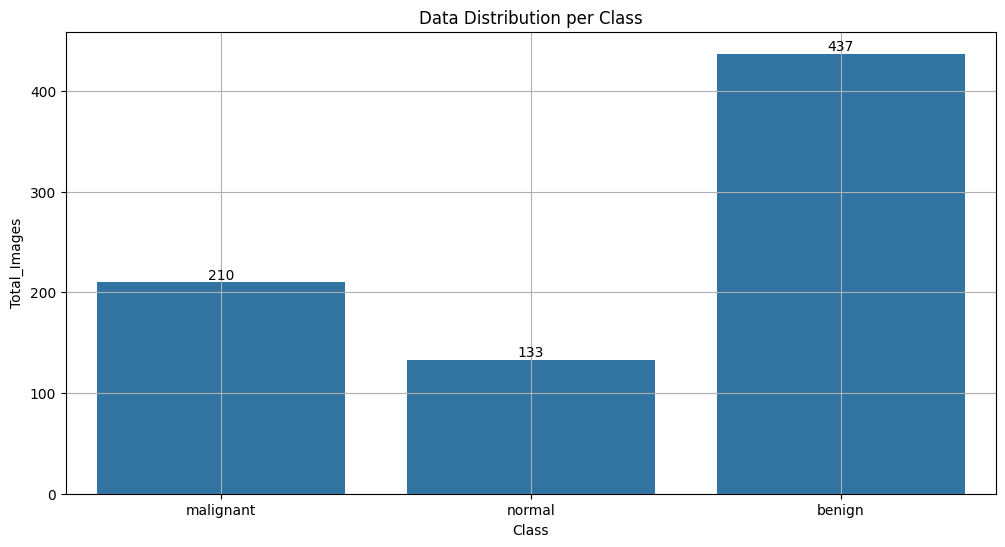

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data1,x='Class', y='Total_Images')
plt.title('Data Distribution per Class')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [9]:
 from tqdm import tqdm

filenames = []
folder = []
image = []
for path, subdirs, files in tqdm(os.walk(path_dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]

data2 = pd.DataFrame({'Images Path':filenames, 'Class':folder, 'Images Name':image})

4it [00:00, 175.70it/s]


In [10]:
extension = []
for i in range (sum(data1['Total_Images'])) :
    strValue = data2['Images Name'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [11]:
data2['Extension'] = extension
data2

,Images Path,Class,Images Name,Extension
0,/content/drive/MyDrive/Capstone_Dataset/malign...,malignant,malignant (102).png,.png
1,/content/drive/MyDrive/Capstone_Dataset/malign...,malignant,malignant (100).png,.png
2,/content/drive/MyDrive/Capstone_Dataset/malign...,malignant,malignant (10).png,.png
3,/content/drive/MyDrive/Capstone_Dataset/malign...,malignant,malignant (1).png,.png
4,/content/drive/MyDrive/Capstone_Dataset/malign...,malignant,malignant (103).png,.png
...,...,...,...,...
775,/content/drive/MyDrive/Capstone_Dataset/benign...,benign,benign (97).png,.png
776,/content/drive/MyDrive/Capstone_Dataset/benign...,benign,benign (91).png,.png
777,/content/drive/MyDrive/Capstone_Dataset/benign...,benign,benign (90).png,.png
778,/content/drive/MyDrive/Capstone_Dataset/benign...,benign,benign (9).png,.png


In [12]:
data2['Extension'].unique()

array(['.png'], dtype=object)

In [13]:
data2.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()

array(['benign', 'malignant', 'normal'], dtype=object)

In [14]:
from PIL import Image

total_img = 0
usg_payudara = os.path.join(path_dataset)
list_data_images = ['normal', 'malignant', 'benign']

for data in list_data_images:
  dir = os.path.join(usg_payudara, data)
  total = len(os.listdir(dir))
  print(data+' : ', total)
  total_img = total_img + total

  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    print('-',img.size)
  print('...................')

print('\nTotal Images :', total_img)

normal :  133
- (562, 463)
- (550, 471)
- (678, 572)
- (501, 485)
- (568, 470)
...................
malignant :  210
- (916, 551)
- (557, 476)
- (462, 393)
- (449, 598)
- (555, 488)
...................
benign :  437
- (323, 473)
- (766, 585)
- (634, 610)
- (769, 582)
- (777, 578)
...................

Total Images : 780


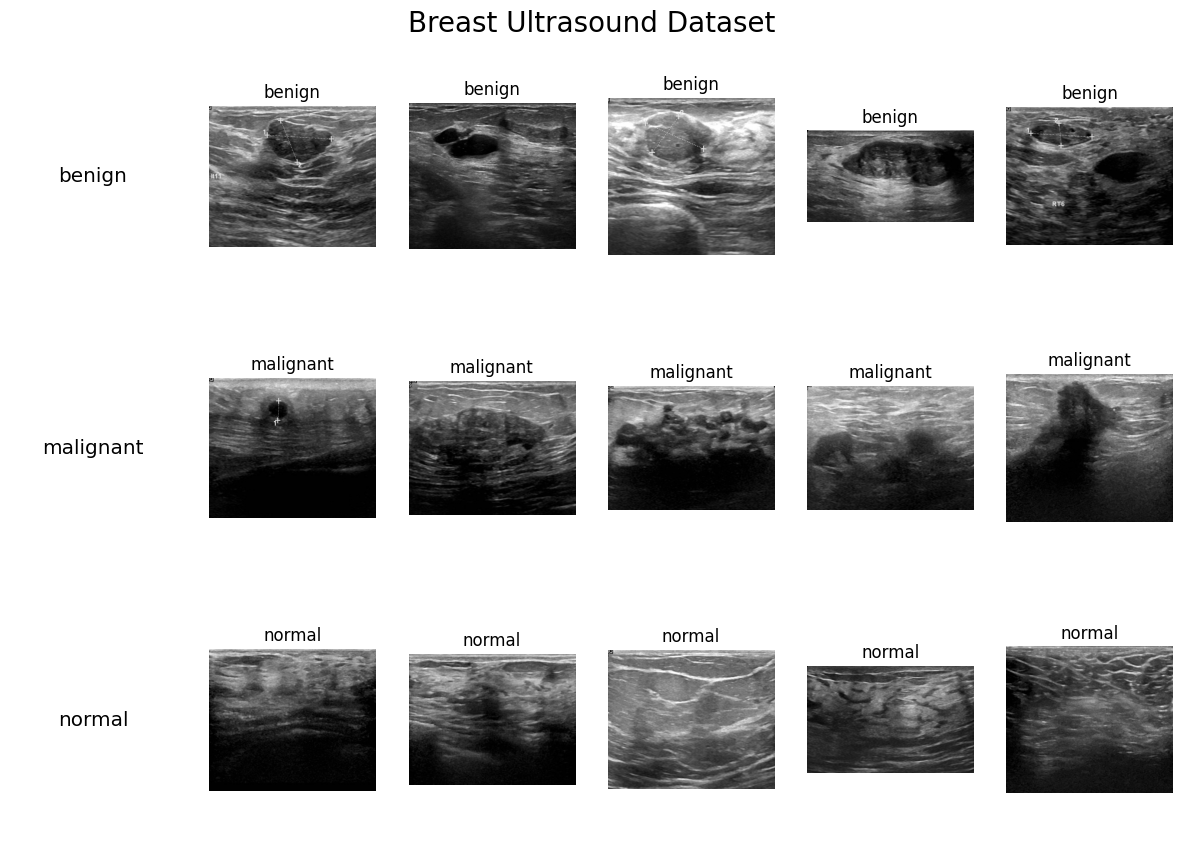

In [15]:
unique_list = []
unique = data2.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15,10))
plt.title('Breast Ultrasound Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 3
img2show = data2.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Images Path'])
        kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.title(f'{kelas}')
plt.show()